In [74]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api 

Null Hypothesis: There is no correlation between sleep and stress

The following dataset shows sleep hours and stress levels with other factors such as heart rate, body temperature, etc.

In [75]:
stress_and_sleep = pd.read_csv('SayoPillow.csv')

In [76]:
stress_and_sleep.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Tidy Data

In [77]:
stress_and_sleep_df = pd.DataFrame(stress_and_sleep)

#Dropped columns that are not necessary for analysis
stress_and_sleep_df.drop(['sr', 'rr','lm', 'bo'], axis=1, inplace=True)

#Descriptive column names
stress_and_sleep_df.columns = ['body_temp', 'rem_sleep', 'sleep_hours', 'heart_rate', 'stress_level']

stress_and_sleep_df.head() 

,body_temp,rem_sleep,sleep_hours,heart_rate,stress_level
0,91.840,99.60,1.840,74.20,3
1,91.552,98.88,1.552,72.76,3
2,96.000,85.00,7.000,60.00,1
3,90.768,96.92,0.768,68.84,3
4,97.872,72.48,8.248,53.12,0


# Explorartory Analysis

<BarContainer object of 630 artists>

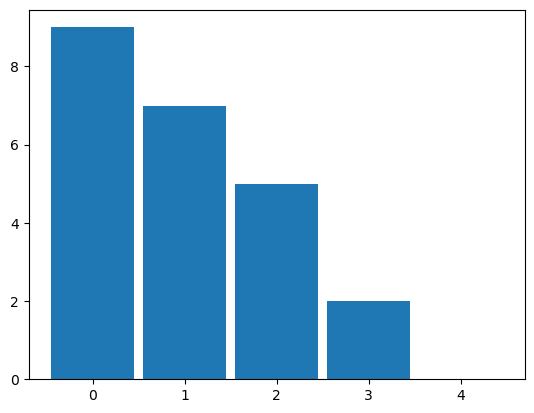

In [84]:
plt.bar(stress_and_sleep_df['stress_level'], stress_and_sleep_df['sleep_hours'], width=0.90)

In [90]:
stats = statsmodels.formula.api.ols(formula="sleep_hours ~ stress_level", data=stress_and_sleep_df).fit()
stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sleep_hours   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.118e+04
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:25:00   Log-Likelihood:                -672.81
No. Observations:                 630   AIC:                             1350.
Df Residuals:                     628   BIC:                             1359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.9000      0.049    162.361      0.000       7.804       7.996
stress_level    -2.1000      0.020   -105.718      0.000      -2.139      -2.061
==============================================================================
Omnibus:                       48.578   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.423
Skew:                          -0.488   Prob(JB):                     1.23e-08
Kurtosis:                       2.342   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is less than 0.05 meaning we can reject the null hypothesis that there is no relationship between sleep and stress. The r-squaured is 0.947, which also shows a strong positive correlation between sleep and stress. Thus, it can be concluded that is relationship between lack of sleep and stress. 

In [ ]:

sns.violinplot()